### Second-Hand Carsales 
    Data Pre-Processing
    Data visualization
    EDA


In [4]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading from directory# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("cars.csv")

In [3]:
df.head(7)

,Unnamed: 0,Unit,vin,price,miles,year,Unnamed: 6,model,vehicle_type,body_type,...,color,zip,state,city,seller_type,is_certified,dom,dom_180,msrp,seller_name
0,1,1,19UDE2F3XGA002005,16997.0,25499.0,2016,NaN,ILX,Car,Sedan,...,NaN,28273,NC,Charlotte,dealer,NaN,60.0,60.0,16997.0,hendrick honda
1,2,1,19UUB1F35FA009543,21491.0,33352.0,2015,NaN,TLX,Car,Sedan,...,Graphite Luster Metallic,28227,NC,Charlotte,dealer,NaN,90.0,3.0,21491.0,hendrick bmw
2,3,1,19UUB2F75FA000172,24499.0,22888.0,2015,NaN,TLX,Van,Sedan,...,Graphite Luster Metallic,28269,NC,Charlotte,dealer,1.0,83.0,82.0,24499.0,audi northlake
3,4,1,1C4BJWDG7HL502000,33635.0,17956.0,2017,NaN,Wrangler,SUV,SUV,...,Firecracker Red,28227,NC,Charlotte,dealer,NaN,154.0,27.0,33635.0,hendrick acura
4,5,1,1C4NJPCB5ED547385,13878.0,71061.0,2014,NaN,Patriot,SUV,SUV,...,True Blue Pearlcoat,28273-6935,NC,Charlotte,dealer,NaN,110.0,49.0,13878.0,hendrickcars.com charlotte
5,6,1,1C4NJRFB9GD586040,12998.0,65101.0,2016,NaN,Patriot,SUV,SUV,...,Granite Crystal Metallic Clearcoat,28227,NC,Charlotte,dealer,NaN,93.0,64.0,12998.0,jaguar charlotte
6,7,1,1C4RJFAG1EC205173,17998.0,80411.0,2014,NaN,Grand Cherokee,SUV,SUV,...,Deep Cherry Red Crystal Pearlcoat,28227,NC,Charlotte,dealer,NaN,46.0,11.0,17998.0,hendrick acura


In [6]:
# Droping uncessary columns
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [7]:
# Renaming Columns
df.rename(columns={'Unnamed: 6':'Manufaturer'}, inplace=True)

In [8]:
# Missing value percentage per column
missing= df.isnull().sum()/df.shape[0]*100
missing

Unit             0.000000
vin              0.000000
price            8.386201
miles            3.984933
year             0.000000
Manufaturer     22.482157
model            0.059477
vehicle_type     0.158604
body_type        3.053132
fuel_type        4.103886
engine           6.978588
transmission     9.595559
color           38.560666
zip              0.000000
state            0.000000
city             0.000000
seller_type      0.000000
is_certified    82.513878
dom              0.019826
dom_180          0.019826
msrp            14.234734
seller_name      0.000000
dtype: float64

<AxesSubplot:>

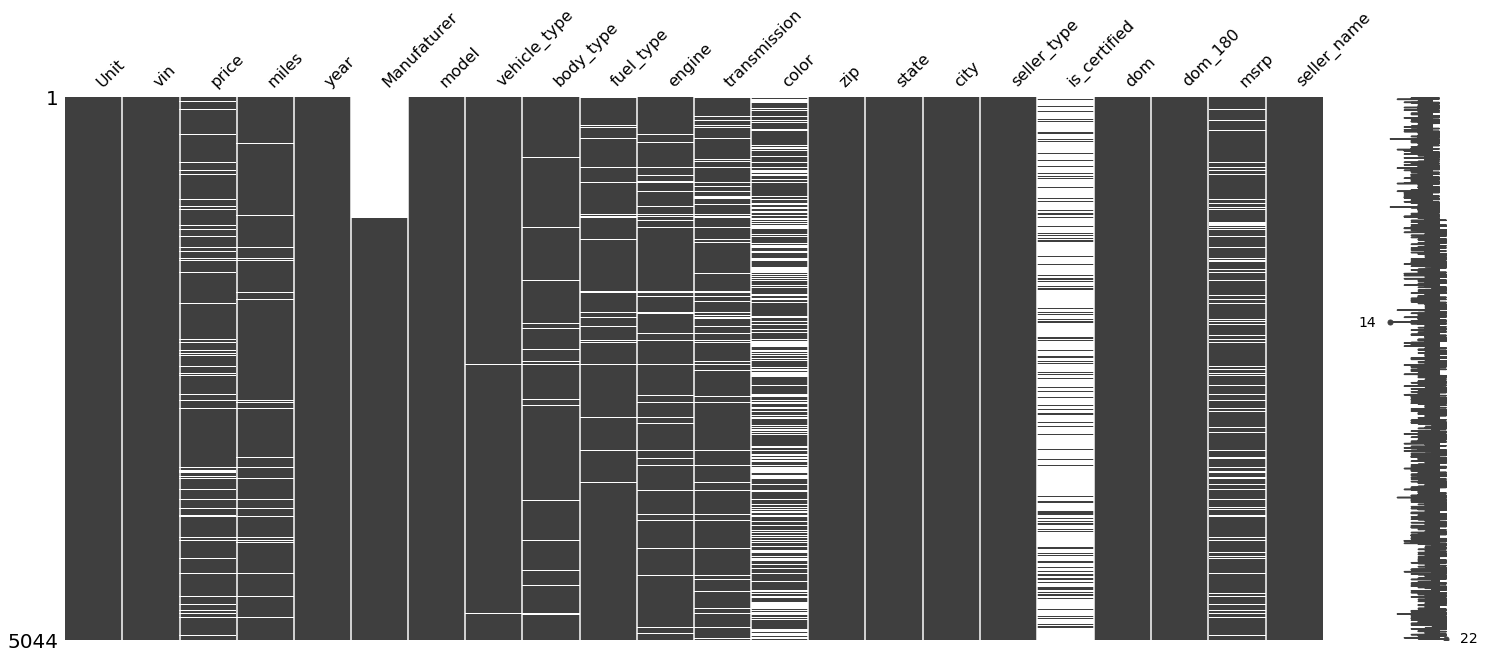

In [7]:
import missingno as msno
msno.matrix(df)

####  Column "Color" and "is_certified" have maximum no: of Missing Values, followed by "Manufaturer" 

In [9]:
# droping columns with more empty values
df.drop(['color','is_certified'], inplace= True, axis=1) 

In [10]:
# Total missing value percentage
cell = np.product(df.shape)
total_missing = df.isnull().sum().sum()
(total_missing/cell) * 100

3.653846153846154

In [16]:
df.columns

Index(['Unit', 'vin', 'price', 'miles', 'year', 'Manufaturer', 'model',
       'vehicle_type', 'body_type', 'fuel_type', 'engine', 'transmission',
       'zip', 'state', 'city', 'seller_type', 'dom', 'dom_180', 'msrp',
       'seller_name'],
      dtype='object')

In [ ]:
# Visualization and EDA

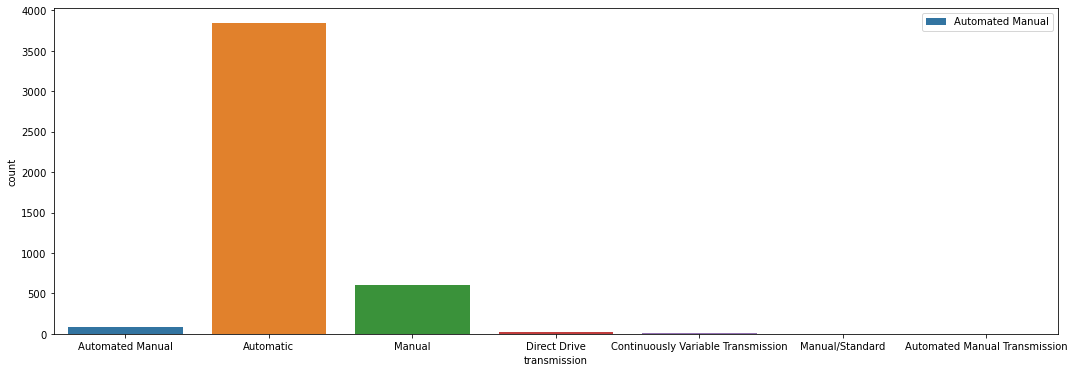

In [15]:
# transmission
"counting types of entries in transmission column"
plt.figure(figsize=(18,6))
sns.countplot(x =df['transmission'], data= df)
plt.legend(df['transmission'])
plt.show()

In [16]:
# Encoding transmission coulumn
df['transmission']=df['transmission'].apply(lambda x:'Manual' if x=='Manual' else ('Automated Manual' if x=='Automated Manual' else ('Automatic' if x=='Automatic' else 'others')))

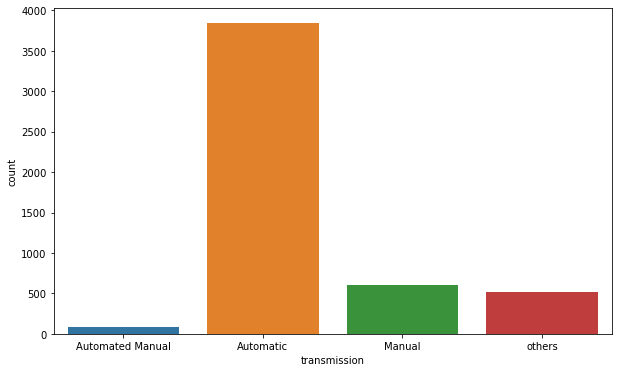

In [17]:
# Encoding result of transmission
plt.figure(figsize=(10,6))
sns.countplot(x =df['transmission'], data = df)
plt.show()

In [45]:
# transmission
t_sum = df["transmission"].value_counts().sum()
t_count = df["transmission"].value_counts()
t = (t_count/t_sum) * 100
t

Automatic                             84.276316
Manual                                13.179825
Automated Manual                       1.951754
Direct Drive                           0.416667
Continuously Variable Transmission     0.109649
Automated Manual Transmission          0.043860
Manual/Standard                        0.021930
Name: transmission, dtype: float64

#### 84.27% cars have to a "Autommatic" Transmission and 13.17% have "Manul" transmission

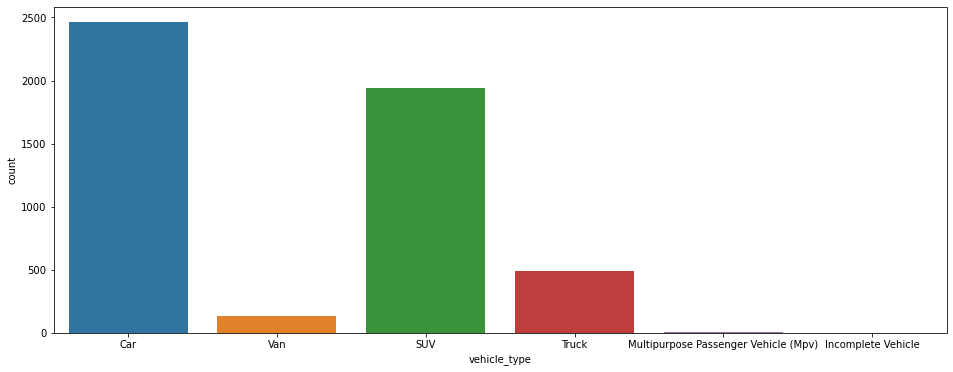

In [19]:
# Vehicle Type
"counting types of entries in vehicle column"
plt.figure(figsize=(16,6))
sns.countplot(x =df['vehicle_type'], data= df)
plt.show()

In [20]:
# Applying encoding on vehicle_type# Encoding result of Vehicle_Type
df['vehicle_type']=df['vehicle_type'].apply(lambda x:'Truck' if x=='Truck' else ('Car' if x=='Car' else ('SUV' if x=='SUV' else  ('Van' if x=='Van' else ('others')))))

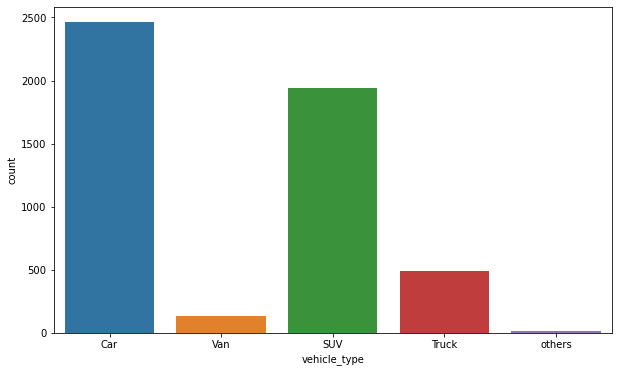

In [21]:
# Encoding result of Vehicle_Type
plt.figure(figsize=(10,6))
sns.countplot(x =df['vehicle_type'], data= df)
plt.show()

#### Most Popular vehicle_type "car" followed by "SUV"

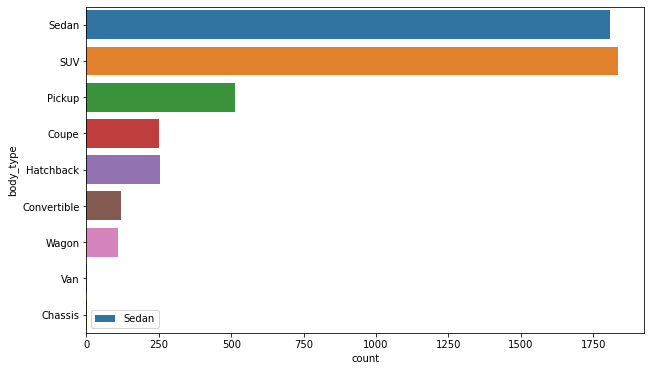

In [22]:
# Body Type
"counting types of entries in body_type"
plt.figure(figsize=(10,6))
sns.countplot(y =df['body_type'], data= df)
plt.legend(df['body_type'])
plt.show()

#### Most Popular car Body_type "Sedan" and "SUV" 

In [44]:
# zip code
zip_sum = df["zip"].value_counts().sum()
zip_count = df["zip"].value_counts()
x = (zip_count/zip_sum) * 100
x.head(5)

28211    32.613006
28227    16.415543
28273    14.413164
28212    11.360032
28213     7.533703
Name: zip, dtype: float64

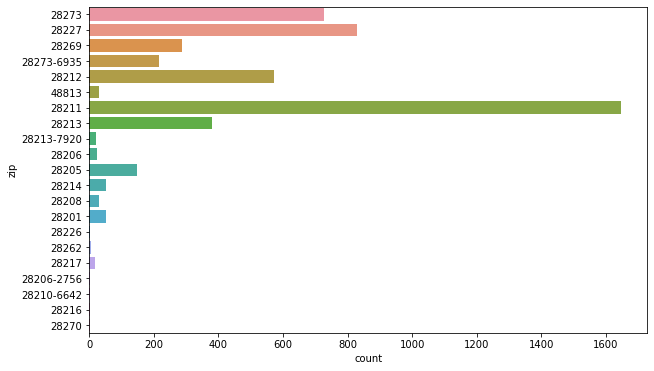

In [37]:
"counting types of entries in zip code"
plt.figure(figsize=(10,6))
sns.countplot(y =df['zip'], data= df)
plt.show()

#### from above code, we have conclude that our 82.33% sellers are from Top five "zip_codes"
    1) 28211: 32.613006%    2) 28227: 16.415543%   3)28273: 14.413164%    4)28212: 11.360032%     5)28213: 7.533703%

In [46]:
# Manufaturer
mnf_sum = df["Manufaturer"].value_counts().sum()
mnf_count = df["Manufaturer"].value_counts()
y = (mnf_count/mnf_sum) * 100
y.head(5)

Chevrolet    10.716113
Honda        10.332481
Ford          9.897698
BMW           9.411765
Toyota        8.670077
Name: Manufaturer, dtype: float64

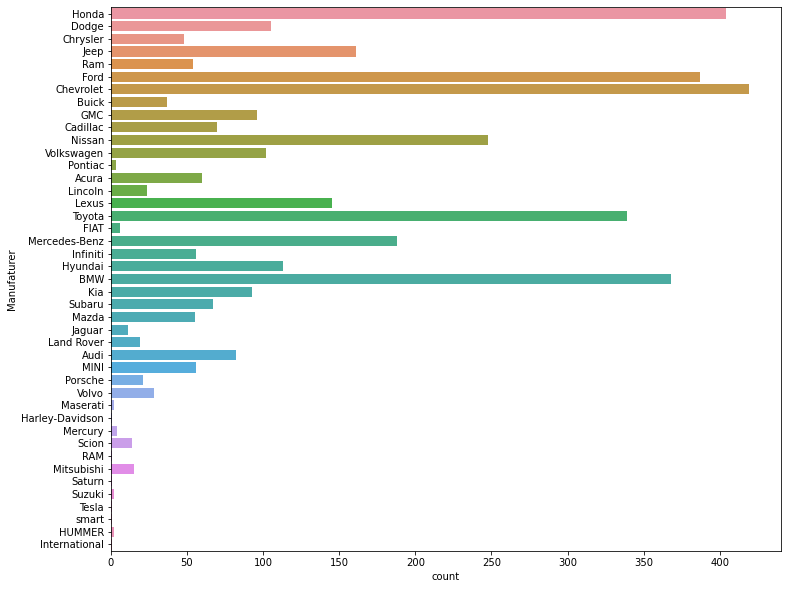

In [40]:
# Manufaturer
"counting types of entries in zip code"
plt.figure(figsize=(12,10))
sns.countplot(y =df['Manufaturer'], data= df)
plt.show()

#### from above code, we have conclude that our 49.02% sells came are from Top five "Manufaturer"
    1) Chevrolet: 10.716113%    2) Honda: 10.332481%   3)Ford: 9.897698%    4)BMW: 9.411765%     5)Toyota: 8.670077%

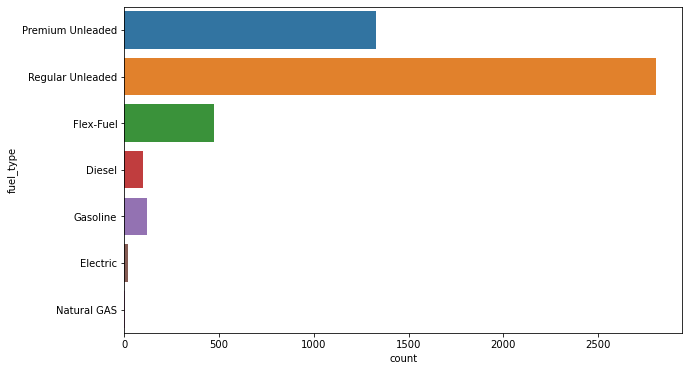

In [25]:
# fuel_type
f_sum = df["fuel_type"].value_counts().sum()
f_count = df["fuel_type"].value_counts()
z = (f_count/f_sum) * 100
z

In [42]:
# fuel_type
"counting types of entries in zip code"
plt.figure(figsize=(10,6))
sns.countplot(y =df['fuel_type'], data= df)
plt.show()

Regular Unleaded    57.990490
Premium Unleaded    27.413686
Flex-Fuel            9.737441
Gasoline             2.418855
Diesel               2.005375
Electric             0.413479
Natural GAS          0.020674
Name: fuel_type, dtype: float64

#### 57.99% cars are runs on "Regular Unleaded" fuel, 27.41% cars are runs on "Premium Unleaded" fuel and  9.73% on Flex-Fule

F:\installed\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

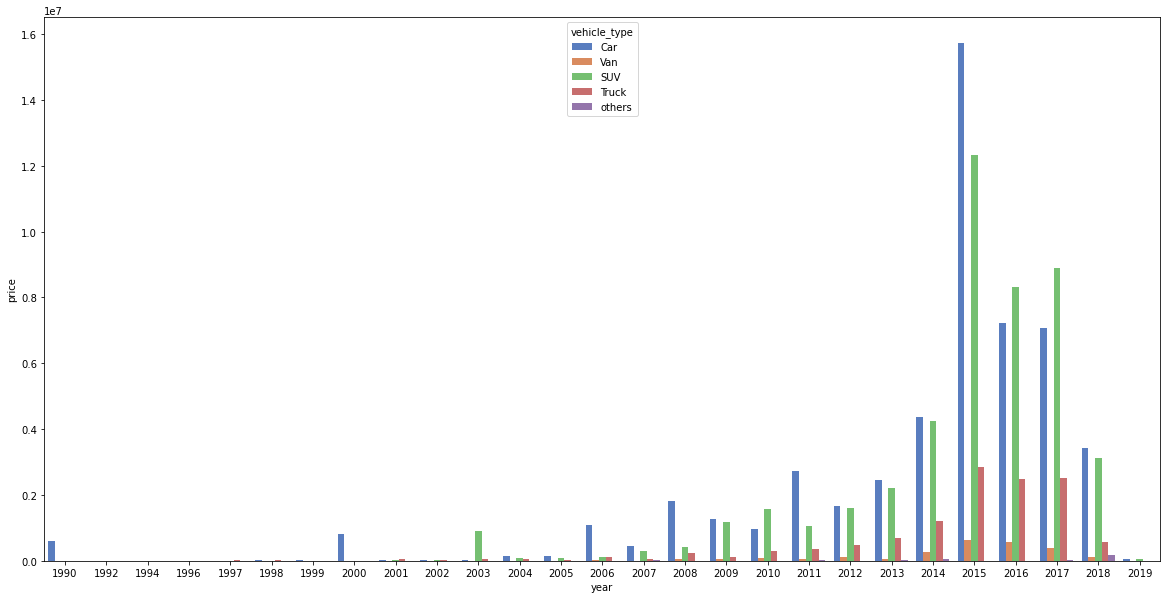

In [26]:
plt.figure(figsize=(20, 10))
sns.barplot("year","price", hue="vehicle_type", ci=None, estimator=np.sum, data=df, palette="muted")

F:\installed\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


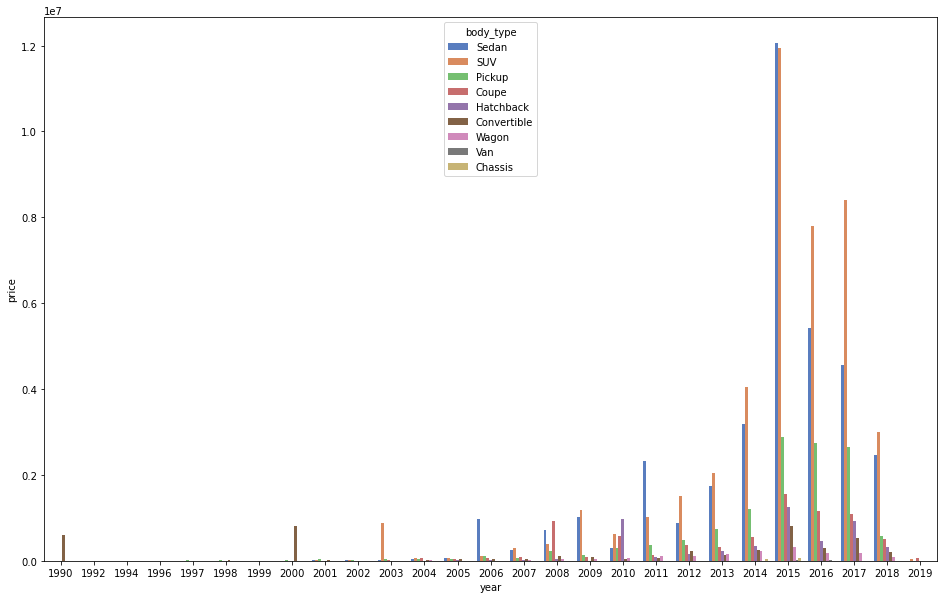

In [12]:
plt.figure(figsize=(16,10))
sns.barplot("year", "price",  hue="body_type", ci=None, estimator=np.sum, data=df, palette='muted')
plt.show()

<Figure size 864x864 with 0 Axes>

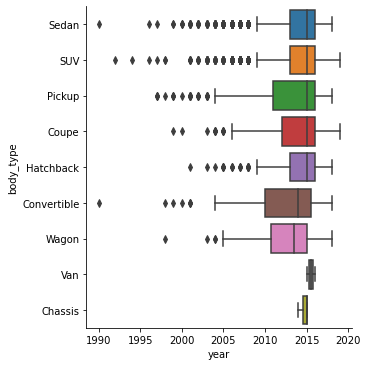

In [31]:
plt.figure(figsize=(12,12))
sns.catplot(y="body_type", x="year",kind="box",data=df);
plt.show()

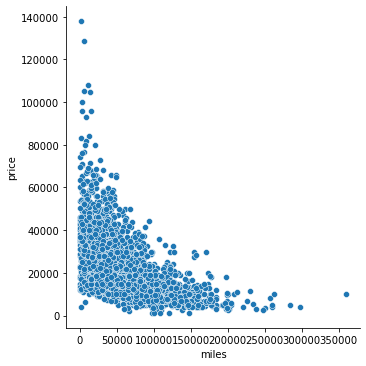

In [28]:
sns.relplot(x="miles", y="price", data=df, kind="scatter");

F:\installed\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


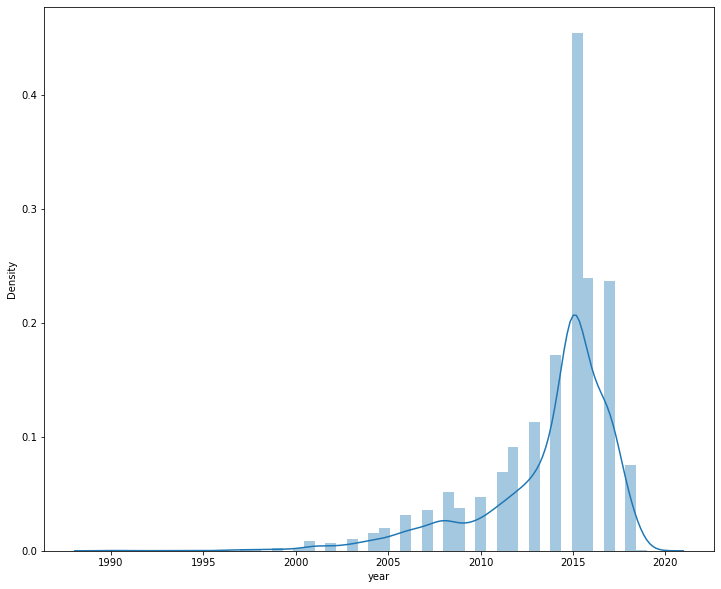

In [14]:
plt.figure(figsize=(12,10))
sns.distplot(df['year'])
plt.show()

F:\installed\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


194


,Unnamed: 0,Unit,vin,price,miles,year,Unnamed: 6,model,vehicle_type,body_type,...,color,zip,state,city,seller_type,is_certified,dom,dom_180,msrp,seller_name
33,34,1,1G11B5SA6GF141432,17150.0,9754.0,2016,NaN,Malibu Limited,Car,Sedan,...,Silver Ice Metallic,28212,NC,Charlotte,dealer,NaN,434.0,196.0,17150.0,young ford
47,48,1,1GCWGFFA8C1170551,9999.0,208564.0,2012,NaN,Express Cargo,Car,NaN,...,NaN,28206,NC,Charlotte,dealer,NaN,346.0,346.0,9999.0,palace auto sales
86,87,1,2HGFG21548H703153,9481.0,85801.0,2008,NaN,Civic,Car,Coupe,...,Red,28211,NC,Charlotte,dealer,NaN,229.0,229.0,9481.0,sonic automotive
102,103,1,3FA6P0RU0ER279233,13998.0,75762.0,2014,NaN,Fusion Hybrid,Car,Sedan,...,Oxford White,28227,NC,Charlotte,dealer,NaN,320.0,320.0,13998.0,hendrick acura
105,106,1,3GCUKSEC0HG175981,41311.0,36426.0,2017,NaN,Silverado 1500,Truck,Pickup,...,Graphite Metallic,28269,NC,Charlotte,dealer,1.0,249.0,208.0,41311.0,mercedes-benz of northlake


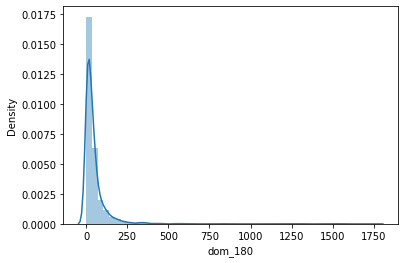

In [3]:
" Q1 how many vehicles are there which are having dom_180(are in stockyard from last 180 days)?"
sns.distplot(df['dom_180'])    
dom_180 = df[df['dom_180']>=180]
print(len(dom_180))                                            
dom_180.head()

F:\installed\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


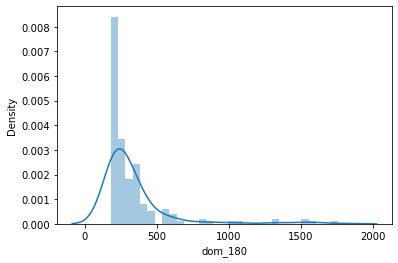

In [10]:
" Q2 Arrange the ascending and descending order of the above list?"
dom180_asc = dom_180.sort_values(by=['dom_180'], ascending = True)
sns.distplot(dom180_asc['dom_180']);
#(dom180_asc['dom_180']).describe()
dom180_des = dom_180.sort_values(by=['dom_180'], ascending = False)

F:\installed\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4328515.0

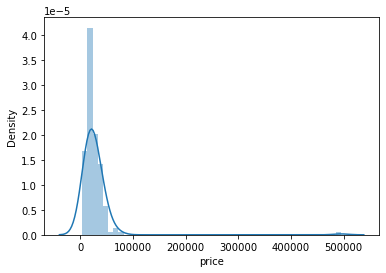

In [4]:
" Q3 How much capital is involved in question 1st?"
sns.distplot(dom_180['price']);
# (dom_180['price']).describe()
(dom_180['price']).sum()

F:\installed\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count        10.000000
mean     872934.700000
std       88473.622191
min      749584.000000
25%      799916.000000
50%      866087.000000
75%      937153.500000
max      999584.000000
Name: price, dtype: float64

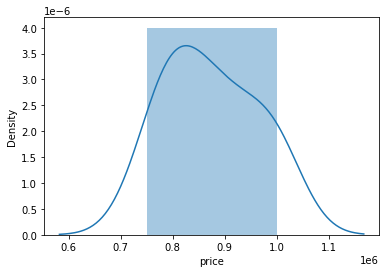

In [5]:
" Q4 which are the top ten costly model are in data?"
costly = (df.sort_values(by=['price'],ascending = False)).head(10)
sns.distplot(costly['price']);
costly['price'].describe()

In [6]:
" Q5 which seller sells most of vehicles?"
most_sell = df['seller_name'].value_counts()
print("\nseller with most selling\n", most_sell.head(1))


seller with most selling
 sonic automotive    1645
Name: seller_name, dtype: int64


In [7]:
" Q6 which seller sells more vehicles from dom_180 list?"
sell180 = dom_180['seller_name'].value_counts()
print("\n highest sale from dom_180\n", sell180.head(1))


 highest sale from dom_180
 pty motors    29
Name: seller_name, dtype: int64


In [8]:
" Q7 which sellers are least selling?"
least_sell = most_sell.sort_values(ascending = True)
print("\n sellers with least sell\n",least_sell.head(12))


 sellers with least sell
 felix sabates ford lincoln    1
little rock auto sales        1
joe's trucks center           1
kd automotive                 1
latorre automotive group      1
victory chevrolet, llc        1
duckworth automotive          1
c.l. badgett auto showcase    1
east coast motorsports        1
prime auto sales              1
scott jaguar                  1
furrst class cars             1
Name: seller_name, dtype: int64


In [9]:
" Q8 Most and Least Selling Vehicles in year 2011,12,13,...17?"
cars_2011 = (df[df["year"]==2011])
cars_2011 = (cars_2011["vehicle_type"]).value_counts()
print("\nMost Sales in 2011:\n", cars_2011.head(1))
print("\nLeast Sales in 2011:\n", cars_2011.tail(1))

cars_2012 = (df[df['year']==2012])
cars_2012 = (cars_2012['vehicle_type']).value_counts()
print("\nMost Sales in 2012:\n", cars_2011.head(1))
print("\nLeast Sales in 2012:\n", cars_2011.tail(1))

cars_2013 = (df[df['year']==2013])
cars_2013 = (cars_2013['vehicle_type']).value_counts()
print("\nMost Sales in 2013:\n", cars_2011.head(1))
print("\nLeast Sales in 2013:\n", cars_2011.tail(1))

cars_2014 = (df[df['year']==2014])
cars_2014 = (cars_2014['vehicle_type']).value_counts()
print("\nMost Sales in 2014:\n", cars_2011.head(1))
print("\nLeast Sales in 2014:\n", cars_2011.tail(1))

cars_2015 = (df[df['year']==2015])
cars_2015 = (cars_2015['vehicle_type']).value_counts()
print("\nMost Sales in 2015:\n", cars_2011.head(1))
print("\nLeast Sales in 2015:\n", cars_2011.tail(1))

cars_2016 = (df[df['year']==2016])
cars_2016 = (cars_2016['vehicle_type']).value_counts()
print("\nMost Sales in 2016:\n", cars_2011.head(1))
print("\nLeast Sales in 2016:\n", cars_2011.tail(1))

cars_2017 = (df[df['year']==2017])
cars_2017 = (cars_2017['vehicle_type']).value_counts()
print("\nMost Sales in 2017:\n", cars_2011.head(1))
print("\nLeast Sales in 2017:\n", cars_2011.tail(1))



Most Sales in 2011:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2011:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2012:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2012:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2013:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2013:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2014:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2014:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2015:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2015:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2016:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2016:
 Van    4
Name: vehicle_type, dtype: int64

Most Sales in 2017:
 Car    101
Name: vehicle_type, dtype: int64

Least Sales in 2017:
 Van    4
Name: vehicle_type, dtype: int64


In [ ]:
# Encoding

In [9]:
# Encoding transmission coulumn
df['transmission']=df['transmission'].apply(lambda x:'2' if x=='Manual' else ('1' if x=='Automated Manual' else ('3' if x=='Automatic' else '0')))

In [10]:
# Applying encoding on vehicle_type
df['vehicle_type']=df['vehicle_type'].apply(lambda x:'2' if x=='Truck' else ('4' if x=='Car' else ('3' if x=='SUV' else  ('1' if x=='Van' else ('0')))))

In [11]:
# encoding state
df['state']=df['state'].apply(lambda x:'0' if x=='NC' else('1' if x=='MI' else 'others'))

In [12]:
# encoding city
df['city']=df['city'].apply(lambda x:'0' if x=='Charlotte' else('1' if x=='others' else 'others'))

In [13]:
# encoding body_state
df['body_type']=df['body_type'].map({"Sedan":0, "SUV":1, "Pickup":2, "Coupe":3, "Hatchback":4, "Convertible":5, "Wagon":6, "van":7, "Chassis":8})
df["body_type"].value_counts()

1.0    1835
0.0    1806
2.0     514
4.0     254
3.0     249
5.0     119
6.0     108
8.0       3
Name: body_type, dtype: int64

In [20]:
# encoding city
df['seller_type']=df['seller_type'].apply(lambda x:'0' if x=='dealer' else('1' if x=='others' else 'others'))

In [23]:
df.dtypes

Unit              int64
vin              object
price           float64
miles           float64
year              int64
Manufaturer      object
model            object
vehicle_type    float64
body_type       float64
fuel_type        object
engine           object
transmission    float64
zip              object
state           float64
city            float64
seller_type     float64
dom             float64
dom_180         float64
msrp            float64
seller_name      object
dtype: object

In [ ]:
# converting object data type into float

In [14]:
df['vehicle_type']=df.vehicle_type.astype(str).astype(float)

In [15]:
df['body_type']=df.body_type.astype(str).astype(float)

In [16]:
df['transmission']=df.transmission.astype(str).astype(float)

In [17]:
df['state']=df.state.astype(str).astype(float)

In [18]:
df['city']=df.state.astype(str).astype(float)

In [22]:
df['seller_type']=df.seller_type.astype(str).astype(float)

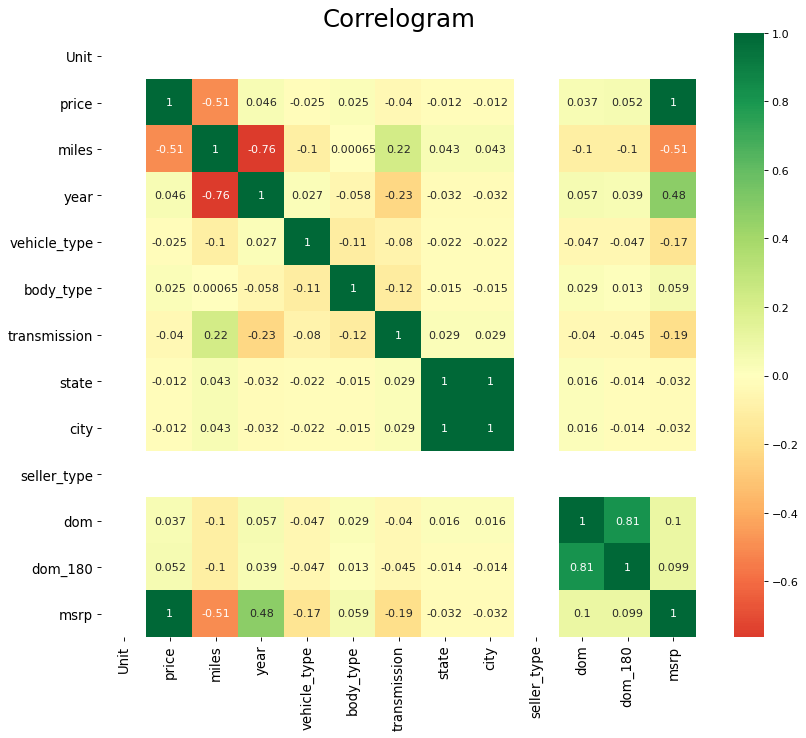

In [25]:
# Correllogram

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Correlation is the relationship between two variables. 
    Values above 0.70, 0.80 indicate a high correlation. 
    Attention should be paid to feature selection while applying the model.